## Iris Flower Classification

In this micro project the different species of iris flower would be classified. The Iris flower data set is a multivariate data set introduced by the British biologist Ronald Fisher in his 1936 paper [Original Paper by R. Fisher](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x), which is also known as or Fisher's Iris data set. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

<img src="iris.png" style="width:700px">

In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

# Visualizing
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Machine Learning
from sklearn import linear_model
from sklearn.datasets import load_iris

# Import SciKit Learn Logistic Regression Library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Logistic Regression Class object
logreg = LogisticRegression(max_iter=2000)

The data and its description is available through scikit learn library:

In [5]:
# Load iris data
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# Preparing x,y for classification
x = load_iris().data
y = load_iris().target

In [8]:
# Make dataframe of x, y (data and target) and check the result
iris_df = pd.DataFrame(data=x, columns=['sepal length','sepal width','petal length','petal width'])
iris_df['species'] = y
iris_df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# Define "flower" function to replace the values of classes with their corresponding species
def flower(num):
    if num==0:
        return 'setosa'
    elif num==1:
        return 'versicolor'
    elif num==2:
        return 'virginica'
    
# Apply "flower" function to iris dataframe
iris_df['species'] = iris_df['species'].apply(flower)
iris_df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Data Visualization

#### Violin Plots

First of all we have a look at the distribution of quantitative data across several levels of categorical variables. Here in the following, the _sepal lenth_, _sepal width_, _petal length_, and _petal width_ are compared against _species_.

<AxesSubplot:xlabel='species', ylabel='petal width'>

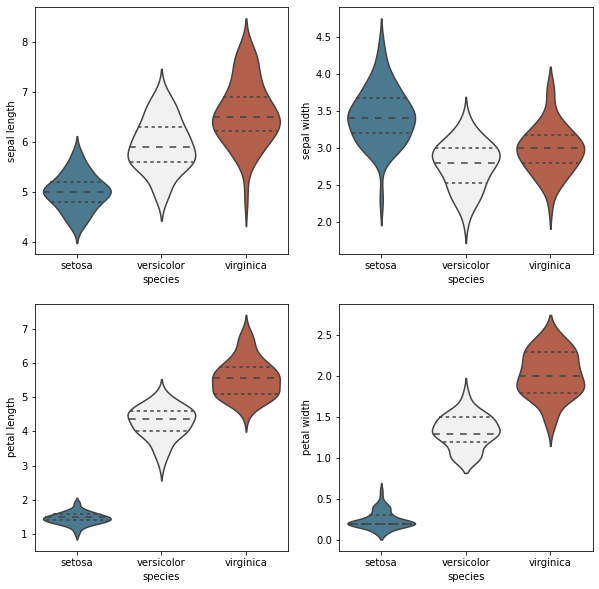

In [7]:
# Define a new palette with 3 distict colors
my_palette = sns.diverging_palette(230, 20, n=3)

# Violinplots for sepal and petal features (length and width) for different species (setosa, versicolor, and virginica)
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.violinplot(x='species', y='sepal length', data=iris_df, palette=my_palette, ax = ax[0,0],
               split=True, scale="count", inner="quartile")
sns.violinplot(x='species', y='sepal width', data=iris_df, palette=my_palette, ax = ax[0,1],
               split=True, scale="count", inner="quartile")
sns.violinplot(x='species', y='petal length', data=iris_df, palette=my_palette, ax = ax[1,0],
               split=True, scale="count", inner="quartile")
sns.violinplot(x='species', y='petal width', data=iris_df, palette=my_palette, ax = ax[1,1],
               split=True, scale="count", inner="quartile")

Petal length and width for the setosa species is total distinct from other species, which is not the same with sepal length and width.

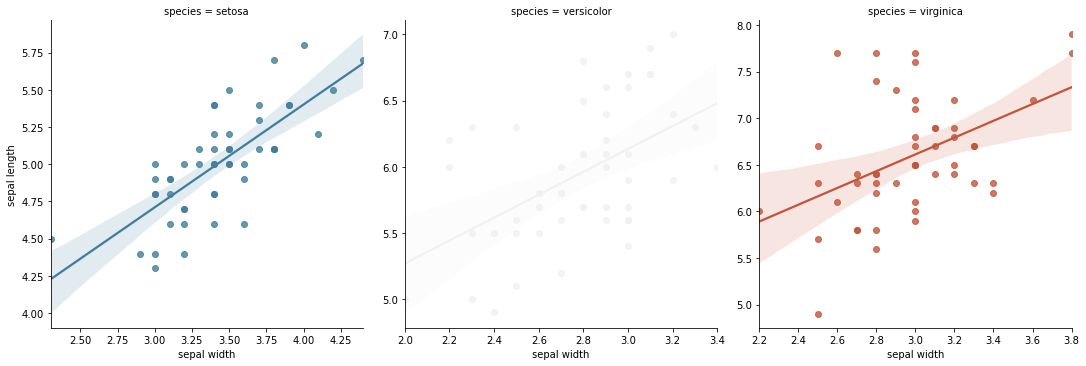

In [8]:
# plot 2D scatterplots with an overlaid regression line for sepal length versus width of different species
sns.lmplot(x = 'sepal width', y = 'sepal length', data = iris_df, col = 'species', hue = 'species', palette = my_palette, 
          sharex = False, sharey = False)

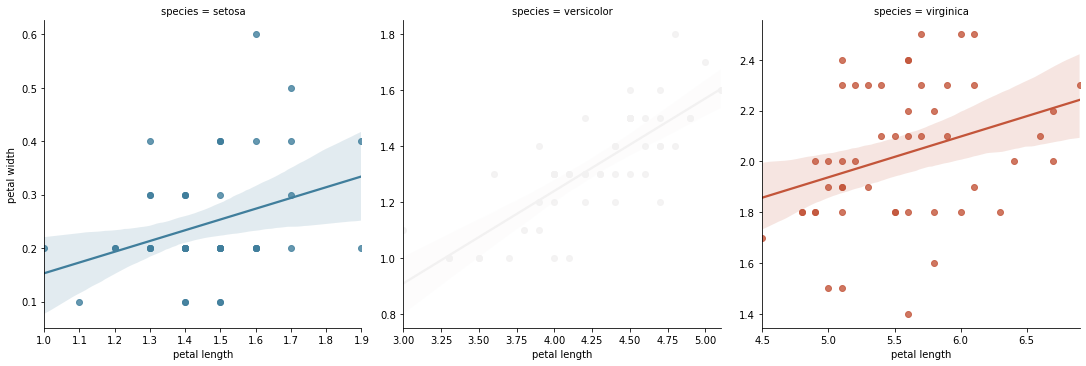

In [9]:
# plot 2D scatterplots with an overlaid regression line for petal width versus length of different species
sns.lmplot(x = 'petal length', y = 'petal width', data = iris_df, col = 'species', hue = 'species', palette = my_palette, 
          sharex = False, sharey = False)

By looking at lmplots we can conclude that in _setosa_ species, the sepal length increases by increasing of the sepal width. But there is not any correlation for petal length and width in this species. In _versicolor_ it is inverse and there is a positive correlation between petal length and width but there is no correlation for the sepal length and width. For _virginica_ species there is not any correlation neither for sepal nor for petal features. 

In the following we will calculate the correlation between different parameters in different spicies and plot the heatmap.

In [10]:
# Compute the correlation matrix
corr = iris_df.corr()
corr

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

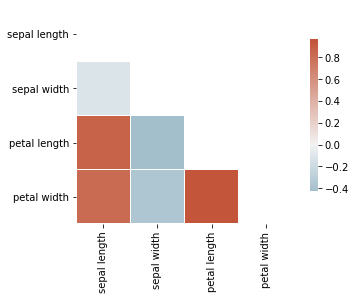

In [11]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

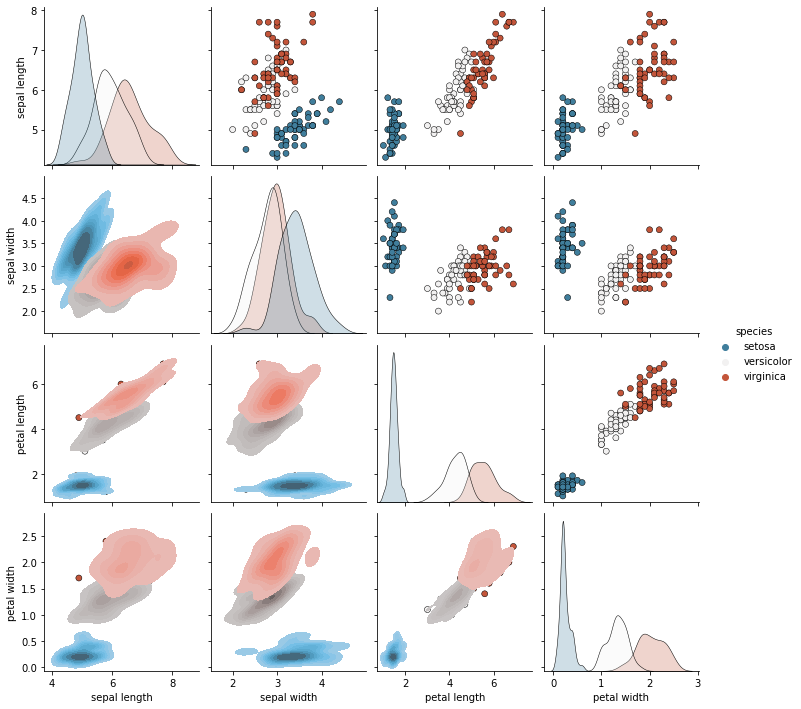

In [12]:
# Plot pairplots of the iris data for 3 different species inclusing scatter and kde plots
g = sns.pairplot(data=iris_df, hue='species', palette=my_palette, 
                 diag_kws={'edgecolor':'k','linewidth':0.5}, plot_kws={'edgecolor':'k', 'linewidth':0.5})
g.map_lower(sns.kdeplot, shade=True)

As shown in above scatter plots, the _setosa_ species (blue group) is quite distinct from the other two types in it would be somehow easy to classified. However, for the other types _versicolor_ and _virginica_ let see if considering all the features could we have a good classification or not.

### Multi Class Classificaiton, One vs All

In this section to seperate data into multiple classes, I used one vs all strategy using SciKit Learn library.
This method actually applying logistic regression for binary classification for each class. Then, the class that is predicted with the highest probability is assigned to that data point.

I made x and y data before and I will use them. To split the data into _training_ and _testing_ datasets, first I used train_test_split method and its default values, but later would set 60% of data for training and 40% for validation and will check the differences. 

#### split to training validation sets by default values

In [13]:
# Setup train and validation (test) datasets
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Check the number of train and test samples chosen by default
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


So by default it dedicate ~75% of dataset for training and the other part for validation.

In [14]:
# Fit the model to training set
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

So now we can predict using the trained model and check the accuracy 

In [15]:
# Prediction from X_test
y_predict = logreg.predict(x_test)

#Check the accuracy
print('The accuracy of the model with 75% as training part is {:.2f}.'.format(accuracy_score(y_test,y_predict)*100))

The accuracy of the model with 75% as training part is 94.74.


#### split to training validation sets by 60% training set

In [16]:
# Setup train and validation (test) datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=3)

# Check the number of train and test samples chosen by default
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# Fit the model to training set
logreg.fit(x_train, y_train)

# Prediction from X_test
y_predict = logreg.predict(x_test)

#Check the accuracy
print('The accuracy of the model with 60% as training part is {:.2f}.'.format(accuracy_score(y_test,y_predict)*100))

(90, 4) (60, 4) (90,) (60,)
The accuracy of the model with 60% as training part is 96.67.


No any considerable change! Lets do some visualization.

In [17]:
# Check the accuracy of the method for different traning sets portion

# Define a range for train size
train_size = np.arange(0.1,1,0.1)
scores = np.zeros(shape=(100,9))

# iterate over different train size
for i in range(0,9):
    # repeat the classification 100 times for each set
    for j in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1-train_size[i])
        logreg.fit(x_train, y_train)
        y_predict = logreg.predict(x_test)
        scores[j][i] = accuracy_score(y_test,y_predict)*100

In [18]:
# Dataframe of scores for different train size and their corresponding accuracy
scores_df = pd.DataFrame(scores, columns=train_size.tolist())
scores_df = pd.melt(scores_df, value_vars=train_size,
                   var_name='Training Part', value_name='Accuracy')

In [19]:
scores_df

,Training Part,Accuracy
0,0.1,66.666667
1,0.1,94.814815
2,0.1,91.851852
3,0.1,94.814815
4,0.1,64.444444
...,...,...
895,0.9,100.000000
896,0.9,100.000000
897,0.9,86.666667
898,0.9,100.000000


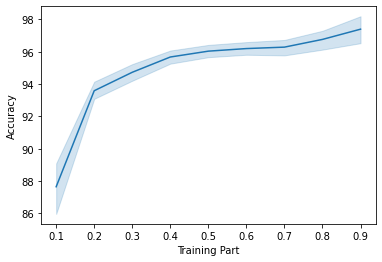

In [20]:
# Plot of accuracy versus train size
chart = sns.lineplot(x='Training Part', y='Accuracy', data=scores_df)

### Multi Class Classificaiton, k-Nearest Neighbors

Applying kNN algorithm using scikit learn for classification.

In [21]:
#Import from SciKit Learn
from sklearn.neighbors import KNeighborsClassifier

# We'll first start with k=6

# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 6)

# Setup train and validation (test) datasets
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Fit the data
knn.fit(x_train,y_train)

# Run a prediction
y_predict = knn.predict(x_test)

#Check the accuracy
print('The accuracy of the model is {:.2f}.'.format(accuracy_score(y_test,y_predict)*100))

The accuracy of the model is 100.00.


Let's check the accuracy of the model for a range of ks.

In [23]:
# Check the accuracy of the method for a range of k nearest neighbors

# Define a range for k nearest neighbors
k_range = range(1,21)
scores_k = np.zeros(shape=(100,21))

# iterate over different ks
for i in k_range:
    # repeat the classification 100 times for each set
    knn = KNeighborsClassifier(n_neighbors=i)
    for j in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y)
        knn.fit(x_train, y_train)
        y_predict = knn.predict(x_test)
        scores_k[j][i] = accuracy_score(y_test,y_predict)*100

In [24]:
# Dataframe of scores for different train size and their corresponding accuracy
scores_k_df = pd.DataFrame(scores_k)
scores_k_df.drop(0, axis='columns', inplace=True)
scores_k_df = pd.melt(scores_k_df, value_vars=k_range,
                   var_name='k nearest neighbors', value_name='Accuracy')

In [25]:
scores_k_df

,k nearest neighbors,Accuracy
0,1,100.000000
1,1,94.736842
2,1,97.368421
3,1,94.736842
4,1,97.368421
...,...,...
1995,20,94.736842
1996,20,100.000000
1997,20,97.368421
1998,20,94.736842


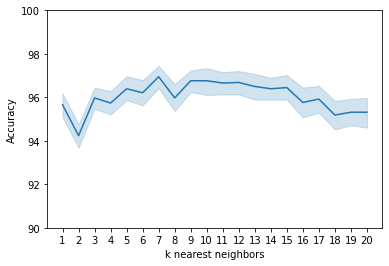

In [26]:
# Plot of accuracy versus k nearest neighbors
fig, ax = plt.subplots()
chart = sns.lineplot(x='k nearest neighbors', y='Accuracy', data=scores_k_df)
plt.ylim([90,100])
ax.set_xticks(k_range)

## Multi Class Classificaiton, Support Vector Machine (SVM)

In this section we will use Support Vector Machine (SVM) to classify the Iris different species. Support Vector Classification (SVC) from SVM in Scikit Learn library will be used for this purpose.

In [9]:
# Support Vector Machine Imports
from sklearn import svm

# creat the SVM model 
svc = svm.SVC()

# Setup train and validation (test) datasets
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Fit the model to training data
svc.fit(x_train,y_train)

# Run a prediction
y_predict = svc.predict(x_test)

#Check the accuracy
print('The accuracy of the model is {:.2f}.'.format(accuracy_score(y_test,y_predict)*100))

The accuracy of the model is 92.11.


### SVM with different kernels

Now in the next part I wanted to check the effect of using different types of kernel. We will use:
 - SVC with linear kernel
 - LinearSVC (linear kernel)
 - SVC with a Gaussian radial bias function (RBF) kernel
 - SVC with polynomial (degree 3) kernel
 
As in the continue we wanted to visualize and plot the decision surface for four SVM classifiers with different kernels, for simplicity (2D plotting) we limited ourselves to just the first two features:
 - Sepal Length
 - Sepal Width

Here also as the goal of this example is to show how different kernels work and visualize support vectors, we take all the datapoints. 
 
It is also good to know that, the linear models `LinearSVC()` and `SVC(kernel='linear')` yield slightly different decision boundaries. This can be a consequence of the following differences:
 - `LinearSVC` minimizes the squared hinge loss while `SVC` minimizes the regular hinge loss.
 - `LinearSVC` uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while `SVC` uses the One-vs-One multiclass reduction.

__Note:__ _that the following code is taken from the Sci Kit Learn Documentation._

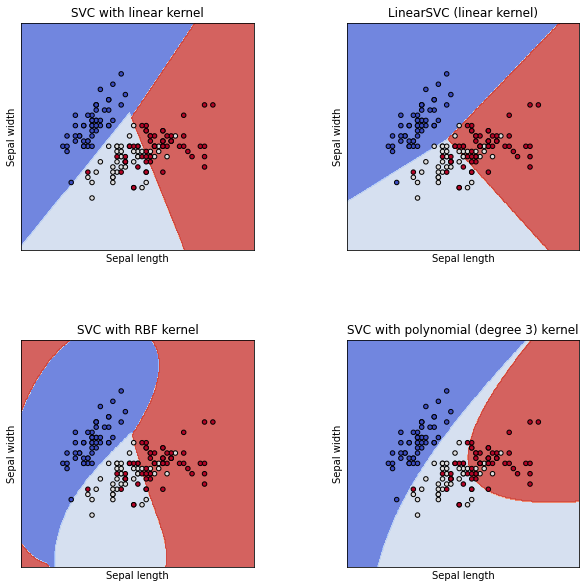

In [13]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()